In [1]:
import numpy as np
import pandas as pd
import folium # For plotting maps
import re
import geopandas # For working with geographical data
import matplotlib  # For plotting in python
import matplotlib.pyplot as plt
import urllib.request, json 

In [2]:
def live_url_req():
        with urllib.request.urlopen("https://api.covid19india.org/state_district_wise.json") as url:
            df_district_wise_case = json.loads(url.read().decode())['West Bengal']['districtData']
            return df_district_wise_case
df_district_wise_case = live_url_req()
def district_wise_case():
    df_district_wise_case = live_url_req()
    state_district_wise_case = pd.DataFrame()
    for key, value in df_district_wise_case.items():
        for k, v in value.items():
            if k == 'confirmed':
                temp_1 = pd.DataFrame({"Cases":[v],"District":[key], })
                state_district_wise_case = state_district_wise_case.append(temp_1)
    state_district_wise_case. sort_values(by='Cases' , ascending= False, inplace=True)
    state_district_wise_case = state_district_wise_case.reset_index(drop=True)
    return state_district_wise_case
state_district_wise_case = district_wise_case()
table_data_1 = []
for i in range(int(state_district_wise_case.shape[0])):
    temp = state_district_wise_case.iloc[i]
    table_data_1.append(dict(temp))

In [3]:
state_district_wise_case

,Cases,District
0,127656,Kolkata
1,121527,North 24 Parganas
2,36925,South 24 Parganas
3,35496,Howrah
4,29371,Hooghly
5,22446,Nadia
6,20565,Purba Medinipur
7,20153,Paschim Medinipur
8,18274,Darjeeling
9,16165,Paschim Bardhaman


In [4]:
df2 = {'Cases': state_district_wise_case.at[12,'Cases']+state_district_wise_case.at[9,'Cases'],'District': 'Barddhaman'}
state_district_wise_case = state_district_wise_case.append(df2, ignore_index = True)
state_district_wise_case

,Cases,District
0,127656,Kolkata
1,121527,North 24 Parganas
2,36925,South 24 Parganas
3,35496,Howrah
4,29371,Hooghly
5,22446,Nadia
6,20565,Purba Medinipur
7,20153,Paschim Medinipur
8,18274,Darjeeling
9,16165,Paschim Bardhaman


In [9]:
state_district_wise_case.at[12,'Cases']+state_district_wise_case.at[9,'Cases']

28759

In [10]:
west_bengal_geojson=geopandas.read_file('/Users/amiksen/Downloads/GitHub/PDS-Website/static/IndiaStateTopojsonFiles-master/WestBengal.geojson')
west_bengal_geojson

,REMARKS_2,Country,State_Name,State_Code,Dist_Name,Dist_Code,geometry
0,None,India,West Bengal,19,Bankura,339,"POLYGON ((86.89942 23.63156, 86.91116 23.62734..."
1,None,India,West Bengal,19,Barddhaman,335,"POLYGON ((87.77013 22.96356, 87.76780 22.95902..."
2,None,India,West Bengal,19,Birbhum,334,"POLYGON ((87.79505 24.57967, 87.79890 24.57781..."
3,None,India,West Bengal,19,Dakshin Dinajpur,331,"POLYGON ((88.27687 25.31151, 88.27431 25.31419..."
4,None,India,West Bengal,19,Darjeeling,327,"POLYGON ((88.48163 26.85117, 88.47404 26.84632..."
5,None,India,West Bengal,19,Purba Medinipur,345,"MULTIPOLYGON (((88.14139 22.02639, 88.14250 22..."
6,None,India,West Bengal,19,Howrah,341,"MULTIPOLYGON (((87.92568 22.42483, 87.92539 22..."
7,None,India,West Bengal,19,Hooghly,338,"POLYGON ((87.77013 22.96356, 87.77180 22.96441..."
8,None,India,West Bengal,19,Cooch Behar,329,"MULTIPOLYGON (((88.78070 26.16367, 88.78605 26..."
9,None,India,West Bengal,19,Kolkata,342,"POLYGON ((88.27065 22.55176, 88.27801 22.54965..."


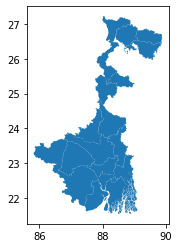

In [7]:
west_bengal_geojson.plot()

In [ ]:
fig=plt.figure(figsize=(850,1000))
m = folium.Map([22.9868,87.8550], tiles='cartodbpositron', zoom_start=7)
folium.Choropleth(
    geo_data=west_bengal_geojson,
    name="choropleth",
    data=state_district_wise_case,
    columns=["District", "Cases"],
    key_on="feature.properties.Dist_Name",
    fill_color="YlGn",
    fill_opacity=0.5,
    line_opacity=0.2,
    legend_name="Active covid cases",
).add_to(m)

folium.LayerControl().add_to(m)
m.save(outfile='map.html')

In [73]:
location = 'Bankura'
state = 'West Bengal'
location_df = pd.read_excel('/Users/amiksen/Downloads/GitHub/PDS-Website/pds/Data_files and other codes/District Lat Long/'+state+'_District_lat_long.xlsx')
location_df
location_cor = location_df.loc[location_df['District'] == location]
location_cor = location_cor.drop(['District'], axis = 1)
location_cor = location_cor.values.tolist()
location_cor[0]
fps_data = pd.read_excel('/Users/amiksen/Downloads/GitHub/PDS-Website/pds/Data_files and other codes/FPS/'+state+'/Fps_'+location+'.xlsx')
fps_map_data = fps_data.loc[:,['lat','long']]
fps_map_data = fps_map_data.dropna(subset = ['lat'], inplace=False)
fps_location = fps_map_data.values.tolist()
fps_map = folium.Map(location=location_cor[0],tiles='cartodbpositron',zoom_start=9.5)
for point in range(0, len(fps_location)):
    folium.Marker(fps_location[point], popup=fps_data['FPS Code'][point], icon=folium.Icon(color='darkred', icon_color='white', icon='building', angle=0, prefix='fa')).add_to(fps_map)
fps_map

In [68]:
wholesaler_data = pd.read_excel('/Users/amiksen/Downloads/GitHub/PDS-Website/pds/Data_files and other codes/Wholesalers/West Bengal/wholesaler_'+location+'.xlsx')
wholesaler_map_data = wholesaler_data.loc[:,['lat','long']]
wholesaler_map_data = wholesaler_map_data.dropna(subset = ['lat'], inplace=False)
wholesaler_location = wholesaler_map_data.values.tolist()
wholesaler_map = folium.Map(location=location_cor[0],tiles='cartodbpositron',zoom_start=10)
for point in range(0, len(wholesaler_location)):
    folium.Marker(wholesaler_location[point], popup=location, icon=folium.Icon(color='green', icon_color='white', icon='truck', angle=0, prefix='fa')).add_to(wholesaler_map)
wholesaler_map

In [34]:
fps_location[22]

[nan, nan]

In [ ]:
wholesaler_data

In [98]:
demand = pd.read_excel('/Users/amiksen/Downloads/GitHub/PDS-Website/pds/Data_files and other codes/Demand/'+state+'/'+location+'.xlsx')
label = demand['Date']
label = label.to_list()
for i in range(len(label)):
    label[i] = label[i].date()
label
demand_r = demand['Demand_Rice'].to_list()
demand_r

[21477894,
 19487812,
 24434062,
 14137666,
 3844166,
 21031839,
 9063533,
 7139926,
 9439008,
 20434817,
 6993835,
 13632266,
 44305,
 14976984,
 25028589,
 3137904,
 5149250,
 712496,
 10129825,
 22739773,
 12534439,
 15566437,
 8447995,
 16656546]

In [97]:
demand

,Date,Demand_Rice,Demand_Wheat,Demad_Sugar
0,2020-01-15,21477894,37909133,801346
1,2020-02-15,19487812,8263773,3058422
2,2020-03-15,24434062,27909286,904341
3,2020-04-15,14137666,35709197,3365340
4,2020-05-15,3844166,25412836,1679046
5,2020-06-15,21031839,20070168,368882
6,2020-07-15,9063533,40583123,2118618
7,2020-08-15,7139926,40042862,3116310
8,2020-09-15,9439008,51416932,1692126
9,2020-10-15,20434817,29200380,2518934
